In [3]:
import sys
import os
import math
import logging
import galsim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def e_measure(image,psf_model,e_truth,pixel_scale=0.1):
    image_epsf = psf_model.drawImage(scale=pixel_scale,method = 'no_pixel')
    results = galsim.hsm.EstimateShear(image, image_epsf)
    e_measure = np.sqrt(results.corrected_e1**2 + results.corrected_e2**2)
    return e_measure-e_truth

In [79]:
def get_intersection(gal,psf,pixel_scale,e_truth):
    image_epsf = psf.drawImage(scale=pixel_scale,method = 'no_pixel')
    final = galsim.Convolve([gal,psf])
    image = final.drawImage(scale = pixel_scale,method ='no_pixel')
    return galsim.hsm.EstimateShear(image,image_epsf).corrected_e2-e_truth

In [115]:
def get_prediction(e_truth,psf_sigma,true_psf_sigma,gal_sigma):
     return e_truth*(np.array(psf_sigma)**2-true_psf_sigma**2)/gal_sigma**2

In [3]:
#Galaxy: Gaussian
#PSF: Gaussian


gal_flux = 1.e2 
gal_sigma = 2.0
e1 = 0.0       
e2 = 0.3
e_truth = np.sqrt(e1**2+e2**2)
pixel_scale = 0.1

gal_gaussian = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)
gal_gaussian = gal_gaussian.shear(e1=e1, e2=e2)

psf_sigma = 0.6 
psf_gaussian = galsim.Gaussian(flux = 1.0, sigma = psf_sigma)

gaussian_gaussian_final = galsim.Convolve([gal_gaussian, psf_gaussian])
gaussian_gaussian_image = gaussian_gaussian_final.drawImage(scale=pixel_scale,method = 'no_pixel')

psf_sigma_gg = np.arange(0.58,0.62,0.001)
gaussian_gaussian=[]
for i in range(len(psf_sigma_gg)):
    psf_model = galsim.Gaussian(flux = 1.0, sigma = psf_sigma_gg[i])
    gaussian_gaussian.append(e_measure(gaussian_gaussian_image,psf_model,e_truth))

In [83]:
#Galaxy: Gaussian
#PSF: Kolmogorov
gal_flux = 1.e2 
gal_sigma = 2.0
e1 = 0.0       
e2 = 0.3
e_truth = np.sqrt(e1**2+e2**2)
pixel_scale = 0.1

gal_gaussian = galsim.Gaussian(flux=gal_flux, sigma=gal_sigma)
gal_gaussian = gal_gaussian.shear(e1=e1, e2=e2)

# psf_sigma = 0.6 
# psf_fwhm = psf_sigma*10/4.47403717041
psf_fwhm = 1.3409999999999955
#print psf_fwhm
psf_kolmogorov = galsim.Kolmogorov(fwhm=psf_fwhm)

intersection = get_intersection(gal_gaussian,psf_kolmogorov,pixel_scale,e_truth)

gaussian_kolmogorov_final = galsim.Convolve([gal_gaussian, psf_kolmogorov])
gaussian_kolmogorov_image = gaussian_kolmogorov_final.drawImage(scale=pixel_scale,method = 'no_pixel')



# psf_model_range = np.arange(0.58,0.62,0.001)
# fwhm_range=psf_model_range*10/4.47403717041

fwhm_range=np.arange(1.3,1.4,0.001)
kolmogorov_psf_model_sigma=[]
gaussian_kolmogorov=[]
for i in range(len(fwhm_range)):
    psf_model = galsim.Kolmogorov(fwhm=fwhm_range[i])
    psf_image = psf_model.drawImage(scale=pixel_scale,method='no_pixel')
    kolmogorov_psf_model_sigma.append(galsim.hsm.EstimateShear(psf_image, psf_image).moments_sigma/10)
    #print fwhm_range[i],galsim.hsm.EstimateShear(psf_image, psf_image).moments_sigma/10
    gaussian_kolmogorov.append(e_measure(gaussian_kolmogorov_image,psf_model,e_truth))
gaussian_kolmogorov=np.array(gaussian_kolmogorov)-intersection

In [81]:
#Galaxy: Sersic
#PSF: Kolmogorov
n=1.0
re=3.9598/1.32088327408
re=2.99784248745
e1 = 0.0       
e2 = 0.3
e_truth = np.sqrt(e1**2+e2**2)
pixel_scale = 0.1

gal_sersic = galsim.Sersic(n, half_light_radius=re)
gal_sersic = gal_sersic.shear(e1=e1, e2=e2)



psf_sigma = 0.6 
psf_fwhm = psf_sigma*10/4.47403717041
psf_kolmogorov = galsim.Kolmogorov(fwhm=psf_fwhm)

intersection = get_intersection(gal_sersic,psf_kolmogorov,pixel_scale,e_truth)
print intersection

gal_image=gal_sersic.drawImage(scale=pixel_scale,method='no_pixel')
results= galsim.hsm.EstimateShear(gal_image, psf_kolmogorov.drawImage(scale=pixel_scale,method = 'no_pixel'))
print results.moments_sigma/10

sersic_kolmogorov_final = galsim.Convolve([gal_sersic, psf_kolmogorov])
sersic_kolmogorov_image = sersic_kolmogorov_final.drawImage(scale=pixel_scale,method = 'no_pixel')



# psf_model_range = np.arange(0.58,0.62,0.001)
# fwhm_range=psf_model_range*10/4.47403717041

fwhm_range=np.arange(1.3,1.4,0.001)
kolmogorov_psf_model_sigma=[]
sersic_kolmogorov=[]
for i in range(len(fwhm_range)):
    psf_model = galsim.Kolmogorov(fwhm=fwhm_range[i])
    psf_image = psf_model.drawImage(scale=pixel_scale,method='no_pixel')
    kolmogorov_psf_model_sigma.append(galsim.hsm.EstimateShear(psf_image, psf_image).moments_sigma/10)
    sersic_kolmogorov.append(e_measure(sersic_kolmogorov_image,psf_model,e_truth))
sersic_kolmogorov=np.array(sersic_kolmogorov)-intersection

-0.0008915245532989391
2.00263347626


In [129]:
#Galaxy: Sersic
#PSF: Kolmogorov
n=4.0
re=13.8758
e1 = 0.0       
e2 = 0.3
e_truth = np.sqrt(e1**2+e2**2)
pixel_scale = 0.1

gal_sersic4 = galsim.Sersic(n, half_light_radius=re)
gal_sersic4 = gal_sersic4.shear(e1=e1, e2=e2)



psf_sigma = 0.6 
psf_fwhm = psf_sigma*10/4.47403717041
psf_kolmogorov = galsim.Kolmogorov(fwhm=psf_fwhm)

gal_image4=gal_sersic4.drawImage(scale=pixel_scale,method='no_pixel')
results= galsim.hsm.EstimateShear(gal_image4, psf_kolmogorov.drawImage(scale=pixel_scale,method = 'no_pixel'))
intersection = get_intersection(gal_sersic4,psf_kolmogorov,pixel_scale,e_truth)

Sersic4_sigma = results.moments_sigma*pixel_scale

sersic4_kolmogorov_final = galsim.Convolve([gal_sersic4, psf_kolmogorov])
sersic4_kolmogorov_image = sersic4_kolmogorov_final.drawImage(scale=pixel_scale,method = 'no_pixel')



# psf_model_range = np.arange(0.58,0.62,0.001)
# fwhm_range=psf_model_range*10/4.47403717041

fwhm_range=np.arange(1.3,1.4,0.001)
kolmogorov_psf_model_sigma=[]
sersic4_kolmogorov=[]
for i in range(len(fwhm_range)):
    psf_model = galsim.Kolmogorov(fwhm=fwhm_range[i])
    psf_image = psf_model.drawImage(scale=pixel_scale,method='no_pixel')
    kolmogorov_psf_model_sigma.append(galsim.hsm.FindAdaptiveMom(psf_image).moments_sigma*pixel_scale)
    #print galsim.hsm.FindAdaptiveMom(psf_image).moments_sigma
    sersic4_kolmogorov.append(e_measure(sersic4_kolmogorov_image,psf_model,e_truth,pixel_scale=pixel_scale))
sersic4_kolmogorov = sersic4_kolmogorov-intersection

In [128]:
results= galsim.hsm.EstimateShear(gal_image4, psf_kolmogorov.drawImage(scale=pixel_scale,method = 'no_pixel'))
print results.moments_sigma

13.6992492676


In [110]:
#psf_kolmogorov = galsim.Kolmogorov(fwhm=1)

gal=galsim.Gaussian(flux=1.e2, sigma=2.0)
e2=0.3
gal = gal.shear(e1=0, e2=e2)
psf = galsim.Kolmogorov(fwhm=1.3409999999999955)
final = galsim.Convolve([gal,psf])
image = final.drawImage(scale=0.1,method = 'no_pixel')
image_epsf = psf.drawImage(scale=0.1,method='no_pixel')

results = galsim.hsm.EstimateShear(image,image_epsf)

print galsim.hsm.FindAdaptiveMom(image_epsf).moments_sigma, galsim.hsm.EstimateShear(image_epsf,image_epsf).moments_sigma
print "There is a %f percent residue in measurement with the true PSF kolmogorov model"  % ((results.corrected_e2-e2)*100/e2)


5.9993929863 5.99956226349
There is a -0.358280 percent residue in measurement with the true PSF kolmogorov model


In [130]:
prediction = e_truth*(psf_model_range**2-psf_sigma**2)/gal_sigma**2
prediction_kolmogorov = e_truth*(np.array(kolmogorov_psf_model_sigma)**2-psf_sigma**2)/gal_sigma**2
prediction_sersic4 = e_truth*(np.array(kolmogorov_psf_model_sigma)**2-psf_sigma**2)/Sersic4_sigma**2

/Users/zhangtianqing/miniconda2/envs/galsim_env/lib/python2.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in divide


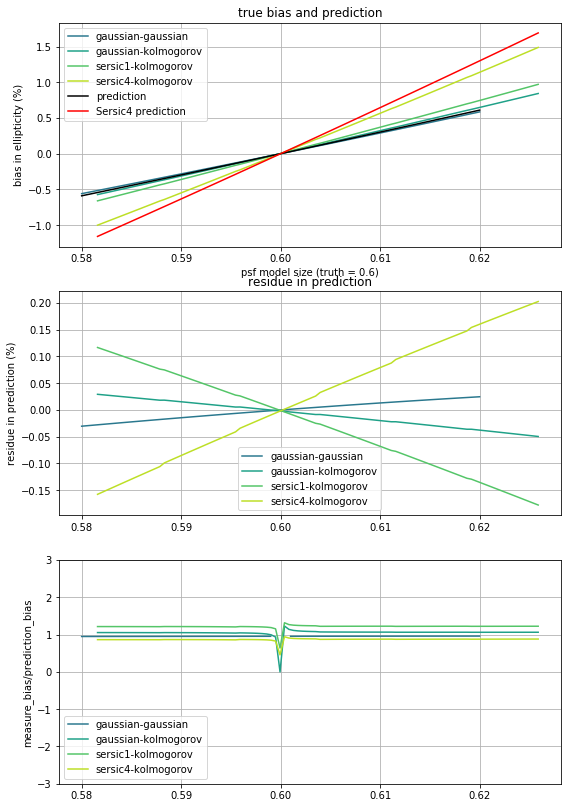

In [132]:
plt.figure(figsize = (9,14))
colors = plt.cm.viridis(np.linspace(0.4, 0.9, 4))
plt.subplot(311)
plt.plot(psf_model_range,gaussian_gaussian/e_truth/0.01,label="gaussian-gaussian",color = colors[0])
plt.plot(kolmogorov_psf_model_sigma,gaussian_kolmogorov/e_truth/0.01,label="gaussian-kolmogorov",color = colors[1])
plt.plot(kolmogorov_psf_model_sigma,sersic_kolmogorov/e_truth/0.01,label="sersic1-kolmogorov",color = colors[2])
plt.plot(kolmogorov_psf_model_sigma,sersic4_kolmogorov/e_truth/0.01,label="sersic4-kolmogorov",color = colors[3])

# plt.plot(psf_model_range,prediction1,label="prediction by myself")
#plt.plot(psf_model_range,prediction2,label="prediction by approximate mine")
plt.plot(psf_model_range,prediction/e_truth/0.01,label="prediction",color='black')
plt.plot(kolmogorov_psf_model_sigma,prediction_sersic4/e_truth/0.01,label="Sersic4 prediction",color='red')

plt.ylabel("bias in ellipticity (%)")
plt.xlabel("psf model size (truth = 0.6)")
plt.title("true bias and prediction")
plt.legend()
plt.grid()

plt.subplot(312)

plt.plot(psf_model_range,(prediction/e_truth-gaussian_gaussian/e_truth)/0.01,label="gaussian-gaussian",color = colors[0])
plt.plot(kolmogorov_psf_model_sigma,(prediction_kolmogorov/e_truth-gaussian_kolmogorov/e_truth)/0.01,label="gaussian-kolmogorov",color = colors[1])
plt.plot(kolmogorov_psf_model_sigma,(prediction_kolmogorov/e_truth-sersic_kolmogorov/e_truth)/0.01,label="sersic1-kolmogorov",color = colors[2])
plt.plot(kolmogorov_psf_model_sigma,(prediction_sersic4/e_truth-sersic4_kolmogorov/e_truth)/0.01,label="sersic4-kolmogorov",color = colors[3])

plt.ylabel("residue in prediction (%)")
plt.title("residue in prediction")
plt.legend()
plt.grid()

plt.subplot(313)

plt.plot(psf_model_range,gaussian_gaussian/prediction,label="gaussian-gaussian",color = colors[0])
plt.plot(kolmogorov_psf_model_sigma,gaussian_kolmogorov/prediction_kolmogorov,label="gaussian-kolmogorov",color = colors[1])
plt.plot(kolmogorov_psf_model_sigma,sersic_kolmogorov/prediction_kolmogorov,label="sersic1-kolmogorov",color = colors[2])
plt.plot(kolmogorov_psf_model_sigma,sersic4_kolmogorov/prediction_sersic4,label="sersic4-kolmogorov",color = colors[3])

plt.ylabel("measure_bias/prediction_bias")
plt.ylim([-3,3])
plt.legend()
plt.grid()


plt.show()

In [6]:
###### 
np.random.random_sample()

0.6728359207035824